In [1]:
import os
import sys
import itertools
import numpy as np

import torch
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

sys.path.append("/home/self_supervised_learning_gr/self_supervised_learning/dev/ProjetCassiopee")
from src.setup import setup_python, setup_pytorch
from src.transformation import RandomCrop, ObjectCrop
from src.dataset import RGBDObjectDataset, RGBDObjectDataset_Supervised_Contrast, RGBDObjectDataset_Unsupervised_Contrast

/home/self_supervised_learning_gr/self_supervised_learning/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
setup_python()

In [3]:
setup_pytorch()

device(type='cuda', index=0)

In [4]:
INPUT_SIZE = (256,256)
# TRANSFORMATION = transforms.Compose(
#         [transforms.ToTensor(),
#          transforms.Resize(size=INPUT_SIZE)])
TRANSFORMATION = transforms.Compose(
        [transforms.ToTensor()])
# CROP_TRANSFORMATION = RandomCrop(output_size=INPUT_SIZE,
#                                  offset_range=(-128, 0))
CROP_TRANSFORMATION = ObjectCrop(output_size=INPUT_SIZE,
                                 padding=(20,20),
                                 offset_range=(-10, 10))

In [5]:
isinstance(CROP_TRANSFORMATION, ObjectCrop)

True

# RGBDObjectDataset

In [6]:
dataset = RGBDObjectDataset(path="rgbd-dataset",
                            mode="train",
                            # class_names=["apple", "banana"],
                            class_names=["dry_battery", "binder"],
                            modalities=["rgb", "depth", "mask", "loc"],
                            transformation=None,
                            crop_transformation=None,
                            nb_max_samples=10)

In [7]:
len(dataset)

10

In [8]:
print(dataset.class_dict)

{'apple': 0, 'ball': 1, 'banana': 2, 'bell_pepper': 3, 'binder': 4, 'bowl': 5, 'calculator': 6, 'camera': 7, 'cap': 8, 'cell_phone': 9, 'cereal_box': 10, 'coffee_mug': 11, 'comb': 12, 'dry_battery': 13, 'flashlight': 14, 'food_bag': 15, 'food_box': 16, 'food_can': 17, 'food_cup': 18, 'food_jar': 19, 'garlic': 20, 'glue_stick': 21, 'greens': 22, 'hand_towel': 23, 'instant_noodles': 24, 'keyboard': 25, 'kleenex': 26, 'lemon': 27, 'lightbulb': 28, 'lime': 29, 'marker': 30, 'mushroom': 31, 'notebook': 32, 'onion': 33, 'orange': 34, 'peach': 35, 'pear': 36, 'pitcher': 37, 'plate': 38, 'pliers': 39, 'potato': 40, 'rubber_eraser': 41, 'scissors': 42, 'shampoo': 43, 'soda_can': 44, 'sponge': 45, 'stapler': 46, 'tomato': 47, 'toothbrush': 48, 'toothpaste': 49, 'water_bottle': 50}


In [9]:
print(len(dataset.x))
print(dataset.x[:10])

10
['dry_battery_3_1_76', 'binder_3_2_3', 'dry_battery_4_1_95', 'dry_battery_2_1_97', 'dry_battery_4_2_68', 'dry_battery_6_1_118', 'dry_battery_3_1_32', 'dry_battery_6_2_87', 'dry_battery_1_1_30', 'dry_battery_4_1_9']


In [10]:
print(len(dataset.y))
print(dataset.y[:10])

10
[13, 4, 13, 13, 13, 13, 13, 13, 13, 13]


In [13]:
data_loader = DataLoader(dataset,
                         batch_size=2,
                         shuffle=False)

In [14]:
len(data_loader)

5

In [12]:
data_iter = iter(data_loader)

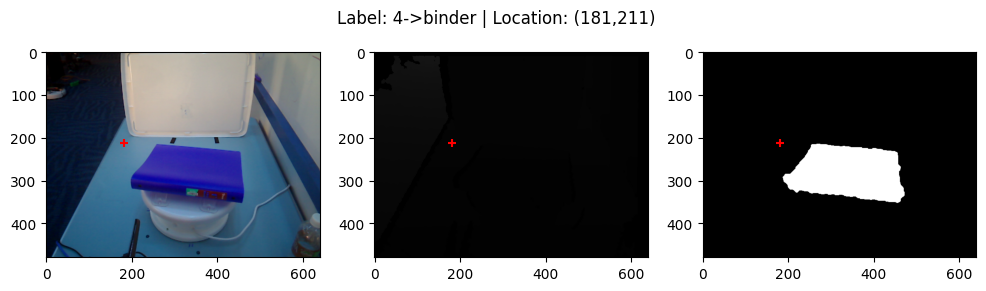

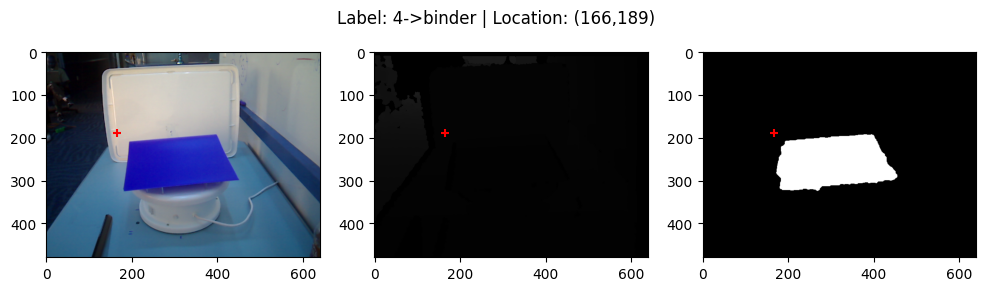

In [13]:
for i, batch in enumerate(data_iter):
    # print(i)
    batch_rgb, batch_depth, batch_mask, batch_loc_x, batch_loc_y, batch_label = batch
    rgb, depth, mask, loc_x, loc_y, label = batch_rgb[0], batch_depth[0], batch_mask[0], batch_loc_x[0], batch_loc_y[0], batch_label[0]
    
    fig, axs = plt.subplots(1, 3, figsize=(12,3))
    axs[0].imshow(rgb.permute(1, 2, 0))
    axs[0].scatter([loc_x], [loc_y], marker="+", c="red")
    axs[1].imshow(depth.permute(1, 2, 0))
    axs[1].scatter([loc_x], [loc_y], marker="+", c="red")
    axs[2].imshow(mask.permute(1, 2, 0))
    axs[2].scatter([loc_x], [loc_y], marker="+", c="red")
    fig.suptitle(f"Label: {label}->{list(dataset.class_dict)[label]} | Location: ({loc_x},{loc_y})")
    
    if i == 4:
        break

In [14]:
for i, batch in enumerate(itertools.islice(data_iter, len(data_loader))):
    # print(i)
    batch_rgb, batch_depth, batch_mask, batch_loc_x, batch_loc_y, batch_label = batch
    rgb, depth, mask, loc_x, loc_y, label = batch_rgb[0], batch_depth[0], batch_mask[0], batch_loc_x[0], batch_loc_y[0], batch_label[0]
    
    fig, axs = plt.subplots(1, 3, figsize=(12,3))
    axs[0].imshow(rgb.permute(1, 2, 0))
    axs[1].imshow(depth.permute(1, 2, 0))
    axs[2].imshow(mask.permute(1, 2, 0))
    fig.suptitle(f"Label: {label}->{list(dataset.class_dict)[label]} | Location: ({loc_x},{loc_y})")

In [15]:
# Retrieve batch data
batch_rgb, batch_depth, batch_mask, batch_loc_x, batch_loc_y, batch_label = next(iter(data_loader))
print(f"RGB batch shape: {batch_rgb.shape}")
print(f"Labels batch shape: {batch_label.shape}")

RGB batch shape: torch.Size([8, 3, 480, 640])
Labels batch shape: torch.Size([8])


In [16]:
# Retrieve individual data
rgb, depth, mask, loc_x, loc_y, label = batch_rgb[0], batch_depth[0], batch_mask[0], batch_loc_x[0], batch_loc_y[0], batch_label[0]

torch.Size([3, 480, 640])


Text(0.5, 0.98, 'Label: 4->binder | Location: (181,211)')

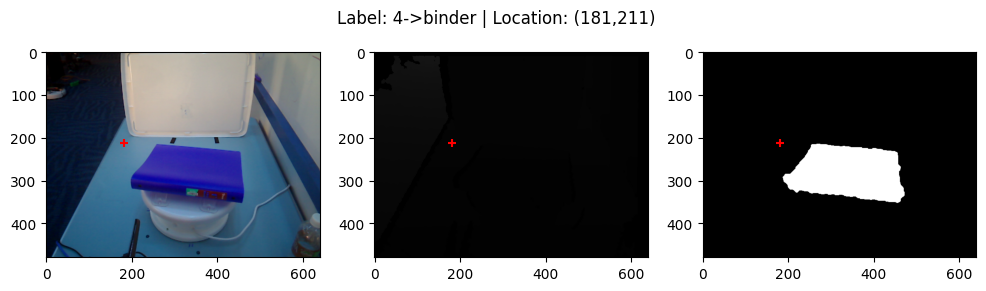

In [17]:
print(rgb.size())
fig, axs = plt.subplots(1, 3, figsize=(12,3))
axs[0].imshow(rgb.permute(1, 2, 0))
axs[0].scatter([loc_x], [loc_y], marker="+", c="red")
axs[1].imshow(depth.permute(1, 2, 0))
axs[1].scatter([loc_x], [loc_y], marker="+", c="red")
axs[2].imshow(mask.permute(1, 2, 0))
axs[2].scatter([loc_x], [loc_y], marker="+", c="red")
fig.suptitle(f"Label: {label}->{list(dataset.class_dict)[label]} | Location: ({loc_x},{loc_y})")

## Crop transformation test

torch.Size([3, 256, 256])


Text(0.5, 0.98, 'Label: 4->binder | Location: (6,0)')

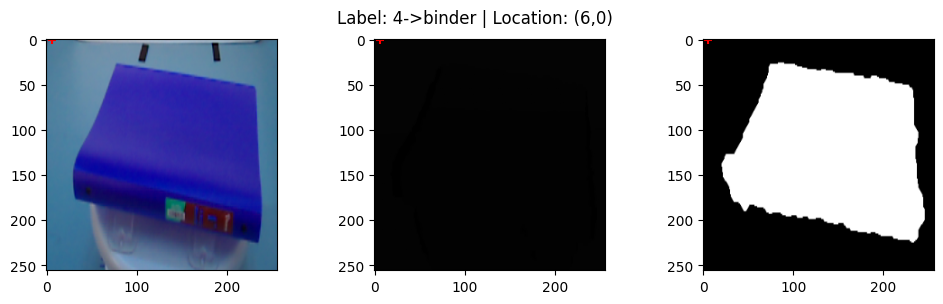

In [18]:
crop_rgb, crop_depth, crop_mask, crop_loc_x, crop_loc_y = CROP_TRANSFORMATION(rgb, depth, mask, loc_x, loc_y)
print(crop_rgb.size())
fig, axs = plt.subplots(1, 3, figsize=(12,3))
axs[0].imshow(crop_rgb.permute(1, 2, 0))
axs[0].scatter([crop_loc_x], [crop_loc_y], marker="+", c="red")
axs[1].imshow(crop_depth.permute(1, 2, 0))
axs[1].scatter([crop_loc_x], [crop_loc_y], marker="+", c="red")
axs[2].imshow(crop_mask.permute(1, 2, 0))
axs[2].scatter([crop_loc_x], [crop_loc_y], marker="+", c="red")
fig.suptitle(f"Label: {label}->{list(dataset.class_dict)[label]} | Location: ({crop_loc_x},{crop_loc_y})")

# RGBDObjectDataset_Supervised_Contrastive

In [19]:
dataset_supervised_contrast = RGBDObjectDataset_Supervised_Contrast(path="rgbd-dataset",
                                                                    mode="train",
                                                                    class_names=["apple", "banana"],
                                                                    modalities=["rgb", "depth", "mask", "loc"],
                                                                    transformation=TRANSFORMATION,
                                                                    crop_transformation=CROP_TRANSFORMATION,
                                                                    nb_max_samples=10)

In [20]:
len(dataset_supervised_contrast)

10

In [21]:
print(dataset_supervised_contrast.class_dict)

{'apple': 0, 'ball': 1, 'banana': 2, 'bell_pepper': 3, 'binder': 4, 'bowl': 5, 'calculator': 6, 'camera': 7, 'cap': 8, 'cell_phone': 9, 'cereal_box': 10, 'coffee_mug': 11, 'comb': 12, 'dry_battery': 13, 'flashlight': 14, 'food_bag': 15, 'food_box': 16, 'food_can': 17, 'food_cup': 18, 'food_jar': 19, 'garlic': 20, 'glue_stick': 21, 'greens': 22, 'hand_towel': 23, 'instant_noodles': 24, 'keyboard': 25, 'kleenex': 26, 'lemon': 27, 'lightbulb': 28, 'lime': 29, 'marker': 30, 'mushroom': 31, 'notebook': 32, 'onion': 33, 'orange': 34, 'peach': 35, 'pear': 36, 'pitcher': 37, 'plate': 38, 'pliers': 39, 'potato': 40, 'rubber_eraser': 41, 'scissors': 42, 'shampoo': 43, 'soda_can': 44, 'sponge': 45, 'stapler': 46, 'tomato': 47, 'toothbrush': 48, 'toothpaste': 49, 'water_bottle': 50}


In [22]:
print(len(dataset_supervised_contrast.x))
print(dataset_supervised_contrast.x[:10])

10
['banana_2_2_160', 'apple_2_1_160', 'banana_1_2_101', 'apple_3_2_118', 'apple_1_1_198', 'banana_4_2_189', 'banana_4_1_17', 'apple_5_2_185', 'banana_3_1_120', 'apple_2_1_149']


In [23]:
print(len(dataset_supervised_contrast.y))
print(dataset_supervised_contrast.y[:10])

10
[2, 0, 2, 0, 0, 2, 2, 0, 2, 0]


In [24]:
data_loader_supervised_contrast = DataLoader(dataset_supervised_contrast,
                                             batch_size=10,
                                             shuffle=False)

In [25]:
# Retrieve batch data
batch_p_data_1, batch_p_data_2, batch_n_data = next(iter(data_loader_supervised_contrast))
batch_p_rgb_1, batch_p_depth_1, batch_p_mask_1, batch_p_loc_x_1, batch_p_loc_y_1, batch_p_label_1 = batch_p_data_1
batch_p_rgb_2, batch_p_depth_2, batch_p_mask_2, batch_p_loc_x_2, batch_p_loc_y_2, batch_p_label_2 = batch_p_data_2
batch_n_rgb, batch_n_depth, batch_n_mask, batch_n_loc_x, batch_n_loc_y, batch_n_label = batch_n_data

In [26]:
print(type(batch_p_rgb_1))
print(batch_p_rgb_1.shape)

<class 'torch.Tensor'>
torch.Size([10, 3, 256, 256])


In [27]:
# Retrieve individual data
p_rgb_1, p_depth_1, p_mask_1, p_loc_x_1, p_loc_y_1, p_label_1 = batch_p_rgb_1[0], batch_p_depth_1[0], batch_p_mask_1[0], batch_p_loc_x_1[0], batch_p_loc_y_1[0], batch_p_label_1[0]
p_rgb_2, p_depth_2, p_mask_2, p_loc_x_2, p_loc_y_2, p_label_2 = batch_p_rgb_2[0], batch_p_depth_2[0], batch_p_mask_2[0], batch_p_loc_x_2[0], batch_p_loc_y_2[0], batch_p_label_2[0]
n_rgb, n_depth, n_mask, n_loc_x, n_loc_y, n_label = batch_n_rgb[0], batch_n_depth[0], batch_n_mask[0], batch_n_loc_x[0], batch_n_loc_y[0], batch_n_label[0]

torch.Size([3, 480, 640])


Text(0.5, 1.0, 'Label: 0->apple | Location: (0,5)')

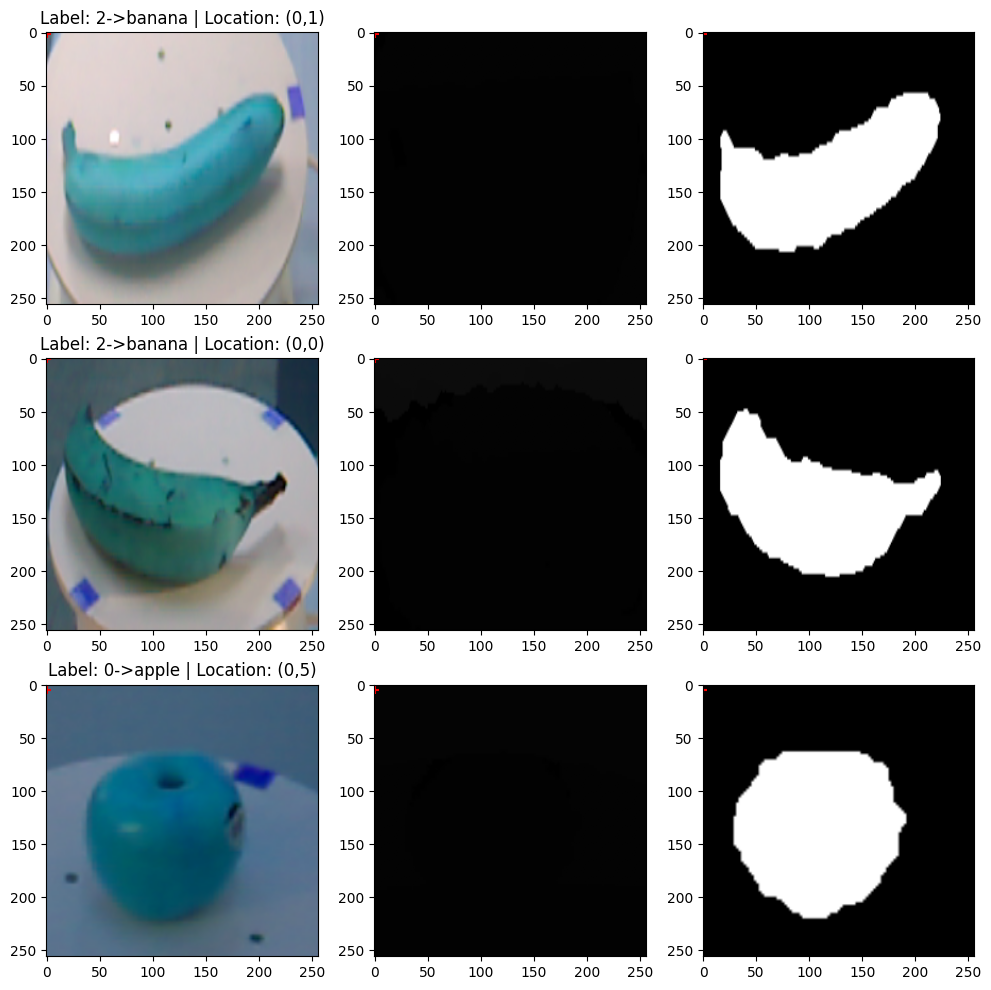

In [28]:
print(rgb.size())
fig, axs = plt.subplots(3, 3, figsize=(12,12))

axs[0,0].imshow(p_rgb_1.permute(1, 2, 0))
axs[0,0].scatter([p_loc_x_1], [p_loc_y_1], marker="+", c="red")
axs[0,1].imshow(p_depth_1.permute(1, 2, 0))
axs[0,1].scatter([p_loc_x_1], [p_loc_y_1], marker="+", c="red")
axs[0,2].imshow(p_mask_1.permute(1, 2, 0))
axs[0,2].scatter([p_loc_x_1], [p_loc_y_1], marker="+", c="red")
axs[0,0].set_title(f"Label: {p_label_1}->{list(dataset.class_dict)[p_label_1]} | Location: ({p_loc_x_1},{p_loc_y_1})")

axs[1,0].imshow(p_rgb_2.permute(1, 2, 0))
axs[1,0].scatter([p_loc_x_2], [p_loc_y_2], marker="+", c="red")
axs[1,1].imshow(p_depth_2.permute(1, 2, 0))
axs[1,1].scatter([p_loc_x_2], [p_loc_y_2], marker="+", c="red")
axs[1,2].imshow(p_mask_2.permute(1, 2, 0))
axs[1,2].scatter([p_loc_x_2], [p_loc_y_2], marker="+", c="red")
axs[1,0].set_title(f"Label: {p_label_2}->{list(dataset.class_dict)[p_label_2]} | Location: ({p_loc_x_2},{p_loc_y_2})")

axs[2,0].imshow(n_rgb.permute(1, 2, 0))
axs[2,0].scatter([n_loc_x], [n_loc_y], marker="+", c="red")
axs[2,1].imshow(n_depth.permute(1, 2, 0))
axs[2,1].scatter([n_loc_x], [n_loc_y], marker="+", c="red")
axs[2,2].imshow(n_mask.permute(1, 2, 0))
axs[2,2].scatter([n_loc_x], [n_loc_y], marker="+", c="red")
axs[2,0].set_title(f"Label: {n_label}->{list(dataset.class_dict)[n_label]} | Location: ({n_loc_x},{n_loc_y})")

# RGBDObject_Unsupervised_Contrast

In [29]:
dataset_unsupervised_contrast = RGBDObjectDataset_Unsupervised_Contrast(path="rgbd-dataset",
                                                                        mode="train",
                                                                        class_names=["apple", "banana"],
                                                                        modalities=["rgb", "depth", "mask", "loc"],
                                                                        transformation=TRANSFORMATION,
                                                                        crop_transformation=CROP_TRANSFORMATION,
                                                                        nb_max_samples=10)

In [30]:
len(dataset_unsupervised_contrast)

10

In [31]:
print(dataset_unsupervised_contrast.class_dict)

{'apple': 0, 'ball': 1, 'banana': 2, 'bell_pepper': 3, 'binder': 4, 'bowl': 5, 'calculator': 6, 'camera': 7, 'cap': 8, 'cell_phone': 9, 'cereal_box': 10, 'coffee_mug': 11, 'comb': 12, 'dry_battery': 13, 'flashlight': 14, 'food_bag': 15, 'food_box': 16, 'food_can': 17, 'food_cup': 18, 'food_jar': 19, 'garlic': 20, 'glue_stick': 21, 'greens': 22, 'hand_towel': 23, 'instant_noodles': 24, 'keyboard': 25, 'kleenex': 26, 'lemon': 27, 'lightbulb': 28, 'lime': 29, 'marker': 30, 'mushroom': 31, 'notebook': 32, 'onion': 33, 'orange': 34, 'peach': 35, 'pear': 36, 'pitcher': 37, 'plate': 38, 'pliers': 39, 'potato': 40, 'rubber_eraser': 41, 'scissors': 42, 'shampoo': 43, 'soda_can': 44, 'sponge': 45, 'stapler': 46, 'tomato': 47, 'toothbrush': 48, 'toothpaste': 49, 'water_bottle': 50}


In [32]:
print(len(dataset_unsupervised_contrast.x))
print(dataset_unsupervised_contrast.x[:10])

10
['banana_2_1_21', 'apple_2_2_104', 'banana_1_2_131', 'banana_3_2_159', 'apple_1_1_82', 'apple_1_2_162', 'apple_4_2_201', 'apple_1_1_105', 'apple_4_1_173', 'apple_1_1_1']


In [33]:
print(len(dataset_unsupervised_contrast.y))
print(dataset_unsupervised_contrast.y[:10])

10
[2, 0, 2, 2, 0, 0, 0, 0, 0, 0]


In [34]:
data_loader_unsupervised_contrast = DataLoader(dataset_unsupervised_contrast,
                                               batch_size=10,
                                               shuffle=False)

In [35]:
# Retrieve batch data
batch_p_data_1, batch_p_data_2, batch_n_data = next(iter(data_loader_unsupervised_contrast))
batch_p_rgb_1, batch_p_depth_1, batch_p_mask_1, batch_p_loc_x_1, batch_p_loc_y_1, batch_p_label_1 = batch_p_data_1
batch_p_rgb_2, batch_p_depth_2, batch_p_mask_2, batch_p_loc_x_2, batch_p_loc_y_2, batch_p_label_2 = batch_p_data_2
batch_n_rgb, batch_n_depth, batch_n_mask, batch_n_loc_x, batch_n_loc_y, batch_n_label = batch_n_data

In [36]:
print(type(batch_p_rgb_1))
print(batch_p_rgb_1.shape)

<class 'torch.Tensor'>
torch.Size([10, 3, 256, 256])


In [37]:
# Retrieve individual data
p_rgb_1, p_depth_1, p_mask_1, p_loc_x_1, p_loc_y_1, p_label_1 = batch_p_rgb_1[0], batch_p_depth_1[0], batch_p_mask_1[0], batch_p_loc_x_1[0], batch_p_loc_y_1[0], batch_p_label_1[0]
p_rgb_2, p_depth_2, p_mask_2, p_loc_x_2, p_loc_y_2, p_label_2 = batch_p_rgb_2[0], batch_p_depth_2[0], batch_p_mask_2[0], batch_p_loc_x_2[0], batch_p_loc_y_2[0], batch_p_label_2[0]
n_rgb, n_depth, n_mask, n_loc_x, n_loc_y, n_label = batch_n_rgb[0], batch_n_depth[0], batch_n_mask[0], batch_n_loc_x[0], batch_n_loc_y[0], batch_n_label[0]

torch.Size([3, 480, 640])


Text(0.5, 1.0, 'Label: 0->apple | Location: (0,0)')

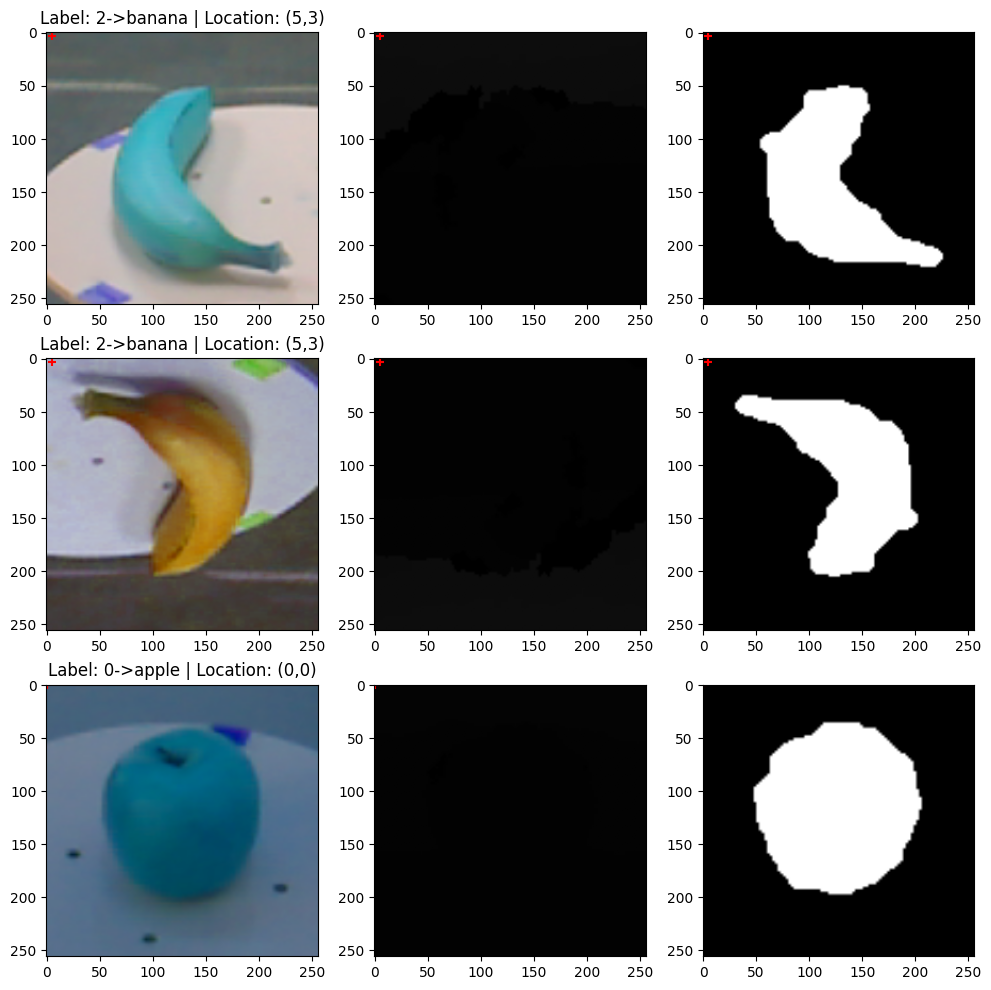

In [38]:
print(rgb.size())
fig, axs = plt.subplots(3, 3, figsize=(12,12))

axs[0,0].imshow(p_rgb_1.permute(1, 2, 0))
axs[0,0].scatter([p_loc_x_1], [p_loc_y_1], marker="+", c="red")
axs[0,1].imshow(p_depth_1.permute(1, 2, 0))
axs[0,1].scatter([p_loc_x_1], [p_loc_y_1], marker="+", c="red")
axs[0,2].imshow(p_mask_1.permute(1, 2, 0))
axs[0,2].scatter([p_loc_x_1], [p_loc_y_1], marker="+", c="red")
axs[0,0].set_title(f"Label: {p_label_1}->{list(dataset.class_dict)[p_label_1]} | Location: ({p_loc_x_1},{p_loc_y_1})")

axs[1,0].imshow(p_rgb_2.permute(1, 2, 0))
axs[1,0].scatter([p_loc_x_2], [p_loc_y_2], marker="+", c="red")
axs[1,1].imshow(p_depth_2.permute(1, 2, 0))
axs[1,1].scatter([p_loc_x_2], [p_loc_y_2], marker="+", c="red")
axs[1,2].imshow(p_mask_2.permute(1, 2, 0))
axs[1,2].scatter([p_loc_x_2], [p_loc_y_2], marker="+", c="red")
axs[1,0].set_title(f"Label: {p_label_2}->{list(dataset.class_dict)[p_label_2]} | Location: ({p_loc_x_2},{p_loc_y_2})")

axs[2,0].imshow(n_rgb.permute(1, 2, 0))
axs[2,0].scatter([n_loc_x], [n_loc_y], marker="+", c="red")
axs[2,1].imshow(n_depth.permute(1, 2, 0))
axs[2,1].scatter([n_loc_x], [n_loc_y], marker="+", c="red")
axs[2,2].imshow(n_mask.permute(1, 2, 0))
axs[2,2].scatter([n_loc_x], [n_loc_y], marker="+", c="red")
axs[2,0].set_title(f"Label: {n_label}->{list(dataset.class_dict)[n_label]} | Location: ({n_loc_x},{n_loc_y})")